In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from numpy import pi
from copy import copy

In [4]:
# @title Data retrieval

url = "https://github.com/steevelaquitaine/projInference/raw/gh-pages/data/csv/data01_direction4priors.csv"
try:
    RequestAPI = requests.get(url)
except requests.ConnectionError:
    print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
else:
    if RequestAPI.status_code != requests.codes.ok:
        print("Failed to download data. Please contact steeve.laquitaine@epfl.ch")
    else:
        with open("data01_direction4priors.csv", "wb") as fid:
            fid.write(RequestAPI.content)

In [16]:
# @title Data loading
data = pd.read_csv("data01_direction4priors.csv")
data.head()

print(data.groupby('subject_id')['session_id'].nunique())
print(data.groupby('subject_id')['trial_index'].nunique())
print(data.groupby('subject_id')['run_id'].nunique())
pivot_table = data.pivot_table(index=["subject_id","session_id", "run_id", "motion_coherence"], values="trial_index", aggfunc="count")
pivot_table

subject_id
1     8
2     8
3     9
4     5
5     6
6     7
7     6
8     6
9     8
10    6
11    6
12    6
Name: session_id, dtype: int64
subject_id
1     226
2     215
3     226
4     215
5     226
6     226
7     226
8     226
9     226
10    226
11    226
12    226
Name: trial_index, dtype: int64
subject_id
1     40
2     34
3     44
4     23
5     27
6     35
7     27
8     27
9     40
10    29
11    30
12    30
Name: run_id, dtype: int64


trial_index
subject_id session_id run_id motion_coherence             
1          1          1      0.06                      107
                             0.12                       73
                             0.24                       33
                      2      0.06                      106
                             0.12                       75
...                                                    ...
12         6          29     0.12                       75
                             0.24                       42
                      30     0.06                       99
                             0.12                       74
                             0.24                       29

[1165 rows x 1 columns]

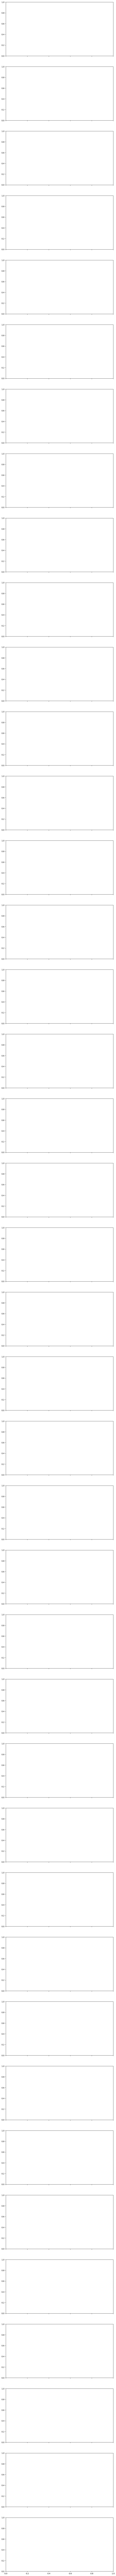

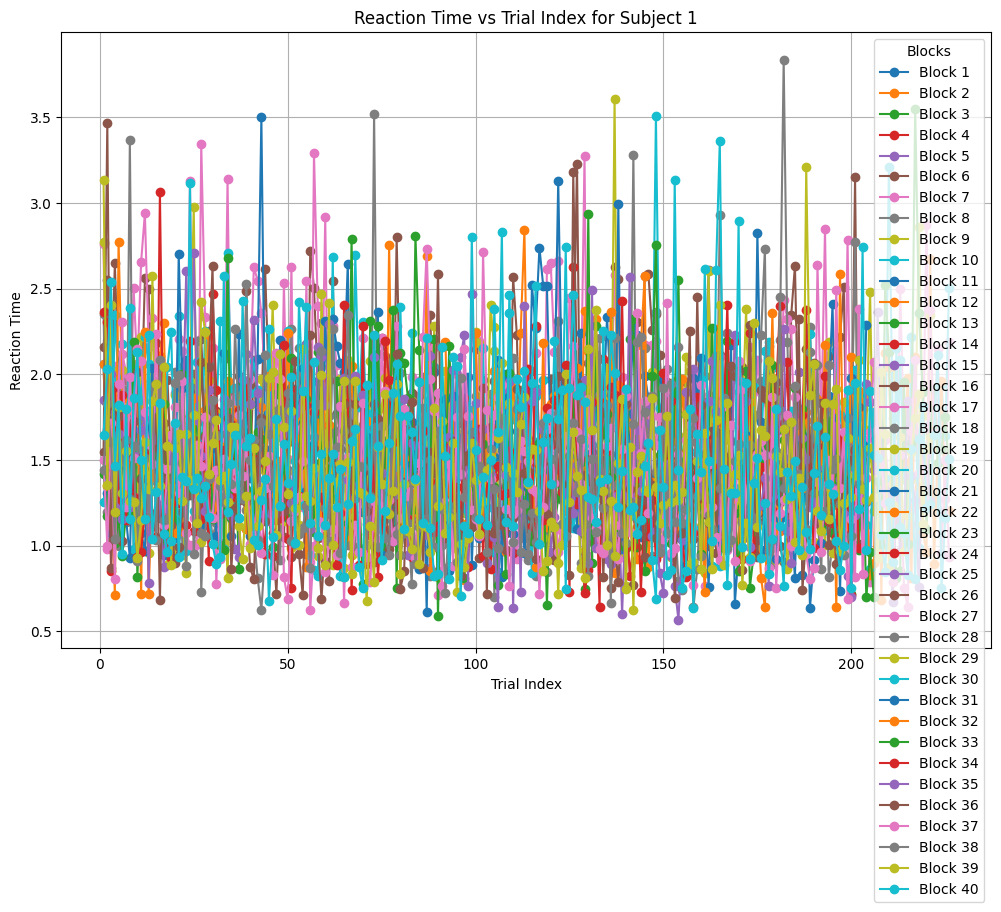

In [33]:
subject_data = data[data['subject_id'] == 1]
unique_blocks = subject_data['run_id'].unique()

fig, axes = plt.subplots(len(unique_blocks), 1, figsize=(10, 6 * len(unique_blocks)), sharex=True)

plt.figure(figsize=(12, 8))

for run_id in unique_blocks:
    block_data = subject_data[subject_data['run_id'] == run_id]
    plt.plot(block_data['trial_index'], block_data['reaction_time'], marker='o', linestyle='-', label=f'Block {run_id}')

plt.xlabel('Trial Index')
plt.ylabel('Reaction Time')
plt.title(f'Reaction Time vs Trial Index for Subject {1}')
plt.legend(title='Blocks')
plt.grid(True)
plt.show()